# Linear Algebra Review: Matrix Decompositions

Content from- An Introduction to Linear Algebra by Strang

In [15]:
!pip install numpy
!pip install matplotlib

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt

# Matrix Decompositions

* Singular Value Decomposition 
* Eigenvalue Decomposition

### Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix $\mathbf{A}$ into three components:

$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top
$$

- $\mathbf{U}$: An orthogonal matrix whose columns are the left singular vectors of $\mathbf{A}$.
- $\mathbf{\Sigma}$: A diagonal matrix containing the singular values of $\mathbf{A}$, which represent the magnitude of the principal components.
- $\mathbf{V}^\top$: The transpose of an orthogonal matrix whose rows are the right singular vectors of $\mathbf{A}$.

SVD is widely used in applications such as dimensionality reduction, image compression, and solving linear systems. It provides insights into the structure of a matrix, including its rank, range, and null space.


In [ ]:
# Random 2D data
A = np.random.randn(5, 3)

# SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)

print('left singular vectors')
print(U)
print('singular values')
print(S)
print('right singular vectors')
print(VT.T)

left singular vectors
[[-0.50036001  0.81016633  0.02712401]
 [ 0.67825034  0.58511381  0.0122313 ]
 [-0.15720176 -0.00625417 -0.33752507]
 [-0.44063102  0.00395616 -0.40436489]
 [ 0.26598543  0.03489376 -0.84951783]]
singular values
[2.94246033 1.84299825 1.18379349]
right singular vectors
[[-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.33333333  2.22222222  3.11111111  4.        ]
 [-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.33333333  2.22222222  3.11111111  4.        ]
 [-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.33333333  2.22222222  3.11111111  4.        ]
 [-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.33333333  2.22222222  3.11111111  4.        ]
 [-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.33333333  2.22222222  3.11111111  4.        ]
 [-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.3333

Original matrix A:
[[-1.07575305  0.8402602   1.59211747]
 [ 2.09580291  0.85844867  0.12911692]
 [-0.54755928  0.25457938 -0.09545113]
 [-1.34951462  0.25939784  0.14740845]
 [ 0.47037477  0.85811773 -0.81877958]]
Low-rank approximation of A (k=2):
[[-1.08463278  0.864306    1.57277962]
 [ 2.09179869  0.86929188  0.12039672]
 [-0.43706194 -0.04464113  0.1451847 ]
 [-1.21713557 -0.09907707  0.4356972 ]
 [ 0.74848585  0.10500875 -0.21312257]]


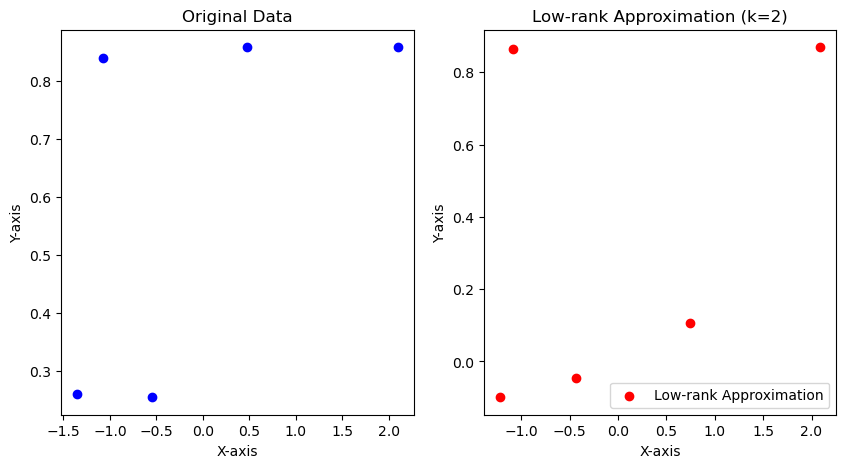

In [12]:
#Low-rank approximation
k = 2
A_k = U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]
print(f"Original matrix A:\n{A}")
print(f"Low-rank approximation of A (k={k}):\n{A_k}")
# Visualize the original and low-rank approximation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(A[:, 0], A[:, 1], color='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.subplot(1, 2, 2)
plt.scatter(A_k[:, 0], A_k[:, 1], color='red', label='Low-rank Approximation')
plt.title(f'Low-rank Approximation (k={k})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

### Deriving Eigenvalue Decomposition from SVD

The Singular Value Decomposition (SVD) of a matrix $\mathbf{A}$ is given by:

$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top
$$

where:
- $\mathbf{U}$ is an orthogonal matrix ($\mathbf{U}^\top \mathbf{U} = \mathbf{I}$),
- $\mathbf{\Sigma}$ is a diagonal matrix containing the singular values of $\mathbf{A}$,
- $\mathbf{V}$ is an orthogonal matrix ($\mathbf{V}^\top \mathbf{V} = \mathbf{I}$).

#### Eigenvalue Decomposition of $\mathbf{C} = \mathbf{A}^\top \mathbf{A}$
1. Compute $\mathbf{A}^\top \mathbf{A}$:
    $$
    \mathbf{A}^\top \mathbf{A} = (\mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top)^\top (\mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top)
    $$

2. Simplify using properties of orthogonal matrices:
    $$
    \mathbf{A}^\top \mathbf{A} = \mathbf{V} \mathbf{\Sigma}^\top \mathbf{U}^\top \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top
    $$

    Since $\mathbf{U}^\top \mathbf{U} = \mathbf{I}$:
    $$
    \mathbf{A}^\top \mathbf{A} = \mathbf{V} \mathbf{\Sigma}^\top \mathbf{\Sigma} \mathbf{V}^\top
    $$

3. Observe that $\mathbf{\Sigma}^\top \mathbf{\Sigma}$ is a diagonal matrix containing the squared singular values of $\mathbf{A}$. Let $\mathbf{\Lambda} = \mathbf{\Sigma}^\top \mathbf{\Sigma}$:
    $$
    \mathbf{C}= \mathbf{A}^\top \mathbf{A} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^\top
    $$

    This is the eigenvalue decomposition of $\mathbf{A}^\top \mathbf{A}$, where:
    - $\mathbf{V}$ contains the eigenvectors of $\mathbf{A}^\top \mathbf{A}$,
    - $\mathbf{\Lambda}$ contains the eigenvalues of $\mathbf{A}^\top \mathbf{A}$.

In [13]:



# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(A.T @ A)

# Print the results
print("Matrix:")
print(A.T @ A)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)



Matrix:
[[ 7.89189774  0.80940521 -1.97391956]
 [ 0.80940521  2.31143525  0.75996147]
 [-1.97391956  0.75996147  3.25274939]]

Eigenvalues:
[8.65807279 1.40136702 3.39664257]

Eigenvectors:
[[-0.93988386 -0.27654758  0.20034914]
 [-0.08011603  0.74887508  0.6578507 ]
 [ 0.33196349 -0.60225207  0.72601149]]


##### Eigenvalue Decomposition \& Optimization

Eigenvalue decomposition as an iterative optimization. The $i$th eigenvector is the minimizer of
$$
\lambda_i = \max_{\mathbf{v}^\top \mathbf{v}_{j}=0 \: \: \forall j < i} \frac{\mathbf{v}^\top \mathbf{C} \mathbf{v}}{\mathbf{v}^\top \mathbf{v}}
$$

Eigenvalue decomposition as an optimization with orthogonality constraints:
$$
\mathbf{V} = \argmax_{\mathbf{W}^\top \mathbf{W} = \mathbf{I}} \mathrm{tr}(\mathbf{W}^\top \mathbf{C} \mathbf{W})
$$

$$
\mathrm{tr}(\boldsymbol{\Lambda}) = \max_{\mathbf{W}^\top \mathbf{W} = \mathbf{I}} \mathrm{tr}(\mathbf{W}^\top \mathbf{C} \mathbf{W})
$$

Using $\mathbf{M} = \mathbf{A}^\top \mathbf{A}$, we have the new objective

$$
\mathbf{V} = \argmin_{\mathbf{W}^\top \mathbf{W} = \mathbf{I}} \| \mathbf{A} - \mathbf{A} \mathbf{W} \mathbf{W}^\top\|_F^2
$$






### Generalized Eigenvalue Decomposition

Recall the eigenvalue decomposition outputs eigenvectors $\mathbf{v}$ and eigenvalues $\lambda$ that solve $ \mathbf{C} \mathbf{v} = \lambda \mathbf{v}$. 

The generalized eigenvalue decomposition uses two square matrices $\mathbf{C}_A, \mathbf{C}_B$:
$$
\mathbf{C}_A \mathbf{w} = \lambda \mathbf{C}_B \mathbf{w}
$$

**Optimization**
$$
\lambda_i = \max_{\mathbf{w}^\top \mathbf{w}_{j}=0 \: \: \forall j < i} \frac{\mathbf{w}^\top \mathbf{C}_A \mathbf{w}}{\mathbf{w}^\top \mathbf{C}_B \mathbf{w}}
$$


**Approximation**
Eigenvalue decomposition of $\mathbf{C}_B^{-1} \mathbf{C}_A$.

*CAUTION* need to compute a matrix inverse.

One way is pseudoinverse 
1. Compute SVD $\mathbf{C}_B = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\top$
2. Compute pseudoiverse $\mathbf{C}_B^{-1} \approx  \mathbf{C}_B^\dagger = \mathbf{V} \boldsymbol{\Sigma}^{-1} \mathbf{U}^\top$.

*Condition number* $\kappa(\mathbf{C}_B) = \sigma_{\mathrm{max}}/\sigma_{\mathrm{min}}$. If big, psudoinverse is unstable.

**Further Reading**

A resource for using SVD to find generalized eigenvalue decomposition: https://www.cis.rit.edu/~rlepci/Erho/Derek/Useful_References/Linear%20Discriminant%20Analysis/Melzer_simul_diag.pdf

In [14]:
# Define two symmetric matrices C_A and C_B
C_A = np.array([[6, 2], [2, 3]])
C_B = np.array([[4, 1], [1, 2]])

# Check the condition number of C_B
cond_number = np.linalg.cond(C_B)
print(f"Condition number of C_B: {cond_number}")

# Ensure C_B is well-conditioned before inverting
if cond_number > 1e10:
    raise ValueError("Matrix C_B is poorly conditioned and may lead to numerical instability.")

# Perform generalized eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.pinv(C_B) @ C_A)

# Print the results
print("Generalized Eigenvalues:")
print(eigenvalues)
print("\nGeneralized Eigenvectors:")
print(eigenvectors)

Condition number of C_B: 2.783611624891225
Generalized Eigenvalues:
[1.63060194 1.22654092]

Generalized Eigenvectors:
[[ 0.57735027 -0.57735027]
 [ 0.81649658  0.81649658]]
